### Используя многочлены степеней N=2,3,4,5, построить аппроксимацию данных переписи населения США в смысле МНК. Аппроксимацию можно строить на основе базисных многочленов следующих видов : $f(x)=\Sigma_{0}^Nc_nx^n; f(x)=\Sigma_{0}^Nc_n((x-1955)/45)^n$

In [65]:
#всегдашний зачин
import sympy
import math
from sympy.matrices import Matrix
from sympy.abc import x,y
from sympy import *
init_printing( use_latex='mathjax' )
phi=symbols("\p")
g = Function("g")
h = Function("h")
f = Function("f")
er = symbols("er")
x=symbols("x")
y=symbols("y")
a=symbols("a")
b=symbols("b")

In [66]:
xlist=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
X=Matrix(xlist)
ylist=[92228496, 106021537,123202624,132164569,151325798,179323175,203211926,226545805,248709873,281421906]
Y=Matrix(ylist)

In [67]:
X.T

[1910  1920  1930  1940  1950  1960  1970  1980  1990  2000]

In [68]:
Y.T

[92228496  106021537  123202624  132164569  151325798  179323175  203211926  2
26545805  248709873  281421906]

In [69]:
import matplotlib.pyplot as plt

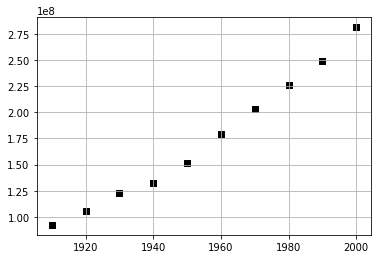

In [70]:
plt.scatter(X,Y,c='black',marker='s')
plt.grid(b=1, which='major', axis='both')

### Многочлены первого вида $f(x)=\Sigma_{0}^Nc_nx^n$

In [71]:
p=[]
for i in range(0,6):
    p.append(Matrix(1,10,[pow(X[0],i),pow(X[1],i),pow(X[2],i),pow(X[3],i),pow(X[4],i),pow(X[5],i),pow(X[6],i),pow(X[7],i),pow(X[8],i),pow(X[9],i)]))
phi=Matrix([p[0],p[1],p[2],p[3],p[4],p[5]])
phi

⎡        1                  1                  1                  1           
⎢                                                                             
⎢      1910               1920               1930               1940          
⎢                                                                             
⎢     3648100            3686400            3724900            3763600        
⎢                                                                             
⎢   6967871000         7077888000         7189057000         7301384000       
⎢                                                                             
⎢ 13308633610000     13589544960000     13874880010000     14164684960000     
⎢                                                                             
⎣25419490195100000  26091926323200000  26778518419300000  27479488822400000  2

       1                  1                  1                  1             
                                                   

In [72]:
b=phi*Y
b

⎡        1744155709        ⎤
⎢                          ⎥
⎢      3427121483070       ⎥
⎢                          ⎥
⎢     6735331781858100     ⎥
⎢                          ⎥
⎢   13239548302454871000   ⎥
⎢                          ⎥
⎢ 26029836442175815650000  ⎥
⎢                          ⎥
⎣51186237641422206656700000⎦

In [73]:
M=phi*phi.T
M

⎡        10                  19550                  38228500                  
⎢                                                                             
⎢      19550               38228500                74768975000               1
⎢                                                                             
⎢     38228500            74768975000            146267953330000            28
⎢                                                                             
⎢   74768975000         146267953330000        286200521217500000         5601
⎢                                                                             
⎢ 146267953330000     286200521217500000      560125055788405000000     109645
⎢                                                                             
⎣286200521217500000  560125055788405000000  1096459931086865750000000  2146809

 74768975000                   146267953330000                  28620052121750
                                                   

In [74]:
sol=M.inv()*b
sol

⎡-14970410032728032876 ⎤
⎢──────────────────────⎥
⎢         2145         ⎥
⎢                      ⎥
⎢ 1276104847001696447  ⎥
⎢ ───────────────────  ⎥
⎢        71500         ⎥
⎢                      ⎥
⎢  -3132561455835173   ⎥
⎢  ──────────────────  ⎥
⎢        171600        ⎥
⎢                      ⎥
⎢    7281438406871     ⎥
⎢    ─────────────     ⎥
⎢        780000        ⎥
⎢                      ⎥
⎢    -68260166193      ⎥
⎢    ─────────────     ⎥
⎢       28600000       ⎥
⎢                      ⎥
⎢       95186063       ⎥
⎢      ─────────       ⎥
⎣      390000000       ⎦

In [75]:
polynom=Matrix(1,6,[pow(x,0),pow(x,1),pow(x,2),pow(x,3),pow(x,4),pow(x,5)])
polynom

⎡       2   3   4   5⎤
⎣1  x  x   x   x   x ⎦

In [76]:
h=polynom*sol
h[0]

          5                4                  3                     2         
95186063⋅x    68260166193⋅x    7281438406871⋅x    3132561455835173⋅x    127610
─────────── - ────────────── + ──────────────── - ─────────────────── + ──────
 390000000       28600000           780000               171600               

                                      
4847001696447⋅x   14970410032728032876
─────────────── - ────────────────────
  71500                   2145        

In [77]:
h=polynom*sol
func1=h
h

⎡          5                4                  3                     2        
⎢95186063⋅x    68260166193⋅x    7281438406871⋅x    3132561455835173⋅x    12761
⎢─────────── - ────────────── + ──────────────── - ─────────────────── + ─────
⎣ 390000000       28600000           780000               171600              

                                       ⎤
04847001696447⋅x   14970410032728032876⎥
──────────────── - ────────────────────⎥
   71500                   2145        ⎦

In [78]:
import numpy as np
from sympy import lambdify

lam_x = lambdify(x, h, modules=['numpy'])

x_vals = np.linspace(1900, 2010, 100)
y_vals = lam_x(x_vals)

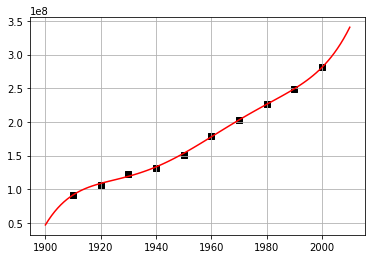

In [79]:
plt.scatter(X,Y,c='black',marker='s')
plt.grid(b=1, which='major', axis='both')
plt.plot(x_vals, y_vals[0][0],c='r')

Итого население составит

In [80]:
res_1=lam_x(2010)[0][0]
res_1

340607747.0

Теперь то же самое, но для другого набора функций

### Многочлены второго вида $f(x)=\Sigma_{0}^Nc_n((x-1955)/45)^n$

In [81]:
p=[]
def mn(j,i):
    return pow((X[j]-1955)/45,i)
for i in range(0,6):
    p.append(Matrix(1,10,[mn(0,i),mn(1,i),mn(2,i),mn(3,i),mn(4,i),mn(5,i),mn(6,i),mn(7,i),mn(8,i),mn(9,i)]))
phi=Matrix([p[0],p[1],p[2],p[3],p[4],p[5]])
phi

⎡1      1       1       1        1         1       1      1      1    1⎤
⎢                                                                      ⎥
⎢-1   -7/9     -5/9    -1/3     -1/9      1/9     1/3    5/9    7/9   1⎥
⎢                                                                      ⎥
⎢      49       25                                       25     49     ⎥
⎢1     ──       ──     1/9      1/81     1/81     1/9    ──     ──    1⎥
⎢      81       81                                       81     81     ⎥
⎢                                                                      ⎥
⎢     -343    -125                                       125    343    ⎥
⎢-1   ─────   ─────   -1/27    -1/729    1/729   1/27    ───    ───   1⎥
⎢      729     729                                       729    729    ⎥
⎢                                                                      ⎥
⎢     2401     625                                      625    2401    ⎥
⎢1    ────     ────    1/81    1/6561   1/6561   1/

In [82]:
b=phi*Y
b

⎡  1744155709  ⎤
⎢              ⎥
⎢ 3459414395/9 ⎥
⎢              ⎥
⎢ 59740269805  ⎥
⎢ ───────────  ⎥
⎢      81      ⎥
⎢              ⎥
⎢ 201728268779 ⎥
⎢ ──────────── ⎥
⎢     729      ⎥
⎢              ⎥
⎢3549319316125 ⎥
⎢───────────── ⎥
⎢     6561     ⎥
⎢              ⎥
⎢13910084475995⎥
⎢──────────────⎥
⎣    59049     ⎦

In [83]:
M=phi*phi.T
M

⎡               110                6446              ⎤
⎢ 10     0      ───       0        ────        0     ⎥
⎢                27                2187              ⎥
⎢                                                    ⎥
⎢       110              6446                443630  ⎥
⎢ 0     ───      0       ────       0        ──────  ⎥
⎢        27              2187                177147  ⎥
⎢                                                    ⎥
⎢110            6446              443630             ⎥
⎢───     0      ────      0       ──────       0     ⎥
⎢ 27            2187              177147             ⎥
⎢                                                    ⎥
⎢       6446            443630              32805806 ⎥
⎢ 0     ────     0      ──────      0       ──────── ⎥
⎢       2187            177147              14348907 ⎥
⎢                                                    ⎥
⎢6446          443630            32805806            ⎥
⎢────    0     ──────     0      ────────      0     ⎥
⎢2187     

In [84]:
sol=M.inv()*b
sol

⎡  21173960901  ⎤
⎢  ───────────  ⎥
⎢      128      ⎥
⎢               ⎥
⎢50738717798631 ⎥
⎢────────────── ⎥
⎢    457600     ⎥
⎢               ⎥
⎢ 228264660225  ⎥
⎢ ────────────  ⎥
⎢     9152      ⎥
⎢               ⎥
⎢-2796772988223 ⎥
⎢───────────────⎥
⎢     45760     ⎥
⎢               ⎥
⎢ -72494761293  ⎥
⎢ ───────────── ⎥
⎢     18304     ⎥
⎢               ⎥
⎢ 1873547278029 ⎥
⎢ ───────────── ⎥
⎣     41600     ⎦

In [85]:
polynom=Matrix(1,6,[pow((x-1955)/45,0),pow((x-1955)/45,1),pow((x-1955)/45,2),pow((x-1955)/45,3),pow((x-1955)/45,4),pow((x-1955)/45,5)])
polynom

⎡                       2            3            4            5⎤
⎢   x    391  ⎛x    391⎞   ⎛x    391⎞   ⎛x    391⎞   ⎛x    391⎞ ⎥
⎢1  ── - ───  ⎜── - ───⎟   ⎜── - ───⎟   ⎜── - ───⎟   ⎜── - ───⎟ ⎥
⎣   45    9   ⎝45    9 ⎠   ⎝45    9 ⎠   ⎝45    9 ⎠   ⎝45    9 ⎠ ⎦

In [86]:
h=polynom*sol
h[0]

                                          5                         4         
                                ⎛x    391⎞                ⎛x    391⎞          
                  1873547278029⋅⎜── - ───⎟    72494761293⋅⎜── - ───⎟    279677
5637635310959⋅x                 ⎝45    9 ⎠                ⎝45    9 ⎠          
─────────────── + ───────────────────────── - ─────────────────────── - ──────
    2288000                 41600                      18304                  

                  3                          2                   
        ⎛x    391⎞                 ⎛x    391⎞                    
2988223⋅⎜── - ───⎟    228264660225⋅⎜── - ───⎟                    
        ⎝45    9 ⎠                 ⎝45    9 ⎠    1064309248181947
─────────────────── + ──────────────────────── - ────────────────
    45760                       9152                  228800     

In [87]:
h=polynom*sol
func2=h
h

⎡                                          5                         4        
⎢                                ⎛x    391⎞                ⎛x    391⎞         
⎢                  1873547278029⋅⎜── - ───⎟    72494761293⋅⎜── - ───⎟    27967
⎢5637635310959⋅x                 ⎝45    9 ⎠                ⎝45    9 ⎠         
⎢─────────────── + ───────────────────────── - ─────────────────────── - ─────
⎣    2288000                 41600                      18304                 

                   3                          2                   ⎤
         ⎛x    391⎞                 ⎛x    391⎞                    ⎥
72988223⋅⎜── - ───⎟    228264660225⋅⎜── - ───⎟                    ⎥
         ⎝45    9 ⎠                 ⎝45    9 ⎠    1064309248181947⎥
──────────────────── + ──────────────────────── - ────────────────⎥
     45760                       9152                  228800     ⎦

In [88]:
import numpy as np
from sympy import lambdify

lam_x = lambdify(x, h, modules=['numpy'])

x_vals = np.linspace(1900, 2010, 100)
y_vals = lam_x(x_vals)

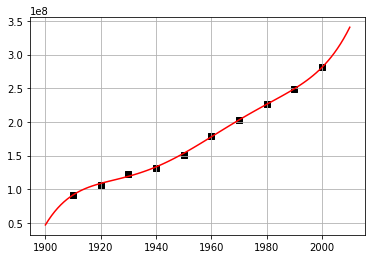

In [89]:
plt.scatter(X,Y,c='black',marker='s')
plt.grid(b=1, which='major', axis='both')
plt.plot(x_vals, y_vals[0][0],c='r')

In [90]:
res_2=lam_x(2010)[0][0]
res_2

340607731.93333435

### Итоги

Первая модель дает полином :

In [94]:
func1[0]

          5                4                  3                     2         
95186063⋅x    68260166193⋅x    7281438406871⋅x    3132561455835173⋅x    127610
─────────── - ────────────── + ──────────────── - ─────────────────── + ──────
 390000000       28600000           780000               171600               

                                      
4847001696447⋅x   14970410032728032876
─────────────── - ────────────────────
  71500                   2145        

Вторая модель дает полином

In [95]:
func2[0]

                                          5                         4         
                                ⎛x    391⎞                ⎛x    391⎞          
                  1873547278029⋅⎜── - ───⎟    72494761293⋅⎜── - ───⎟    279677
5637635310959⋅x                 ⎝45    9 ⎠                ⎝45    9 ⎠          
─────────────── + ───────────────────────── - ─────────────────────── - ──────
    2288000                 41600                      18304                  

                  3                          2                   
        ⎛x    391⎞                 ⎛x    391⎞                    
2988223⋅⎜── - ───⎟    228264660225⋅⎜── - ───⎟                    
        ⎝45    9 ⎠                 ⎝45    9 ⎠    1064309248181947
─────────────────── + ──────────────────────── - ────────────────
    45760                       9152                  228800     

In [91]:
print("first model prediction is "+str(res_1)+"\n"+"second model prediction is "+ str(res_2))

first model prediction is 340607747.0
second model prediction is 340607731.93333435


Население США в 2010 году составило 309.3 миллиона

Обе модели дали ошибку в 30 миллионов человек